In [ ]:
# Data mapping
import pandas


ds = pandas.read_csv("C:/Users/BRUNO/Downloads/survey lung cancer.csv")
X = ds.loc[:,'GENDER':'CHEST PAIN']
y = ds['LUNG_CANCER'].map({'YES':1,'NO':0})

df = X.copy()
df['LUNG_CANCER'] = y
df['GENDER'] = df['GENDER'].map({'M':0,'F':1})

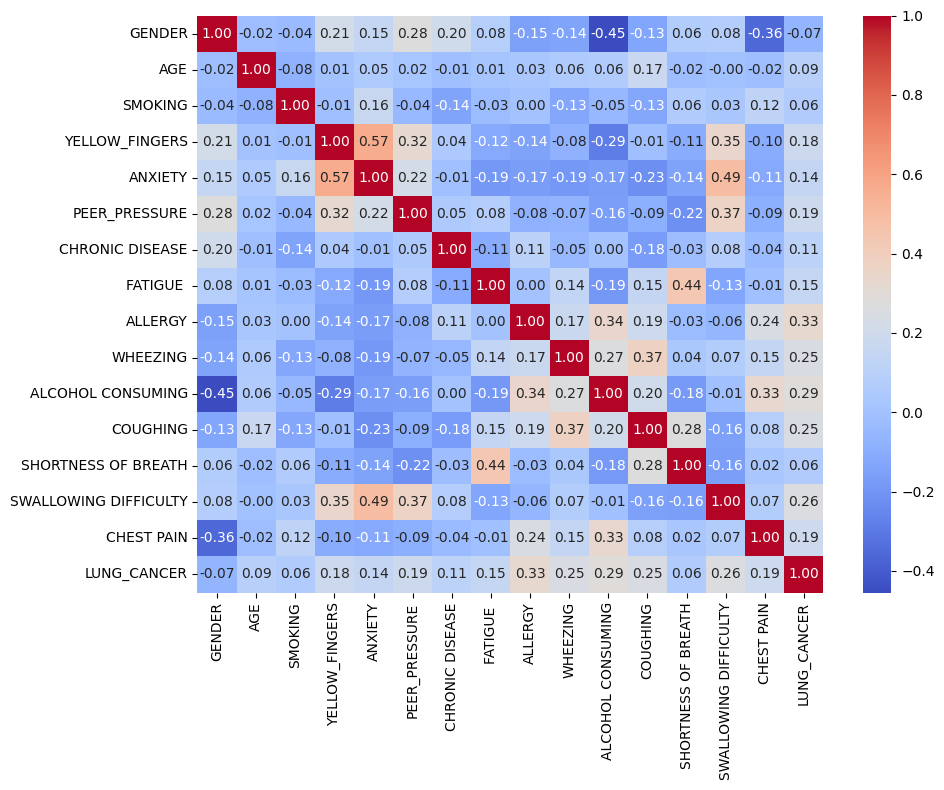

In [ ]:
# Correlation Heatmap generation
import seaborn
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(10,8))
seaborn.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.tight_layout()
plt.show()

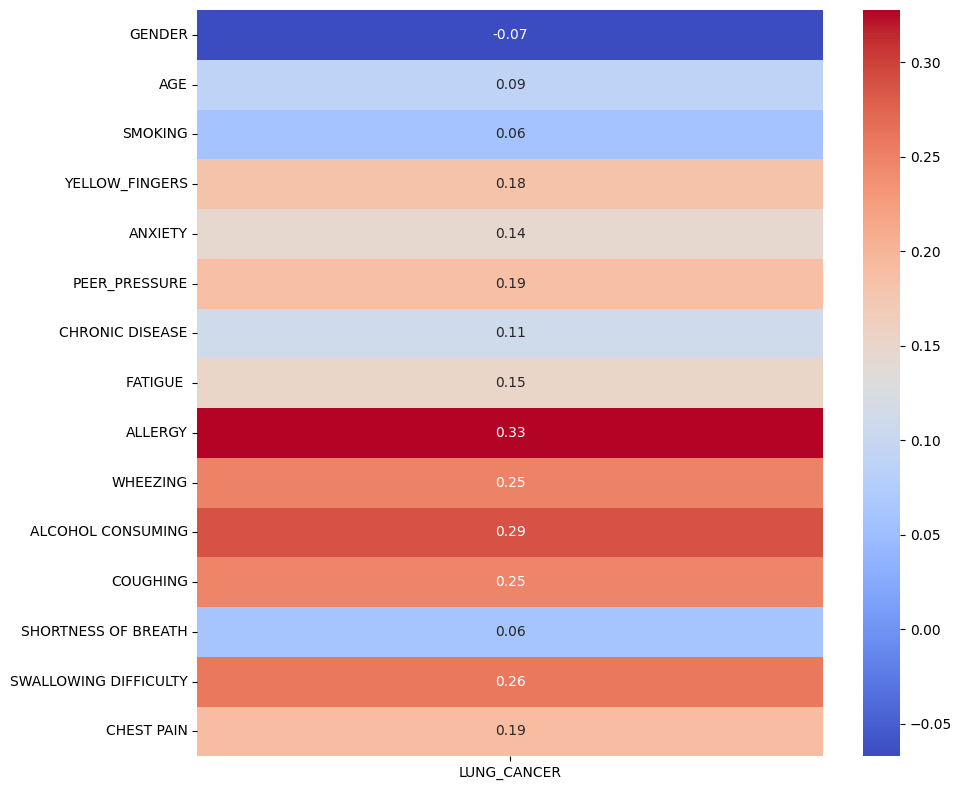

In [ ]:
# Seeing correlation as a single column vs lung cancer
plt.figure(figsize=(10,8))
target_corr = corr_matrix[['LUNG_CANCER']].drop('LUNG_CANCER')
seaborn.heatmap(target_corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Try the differences between accuracy score with and without 'SMOKING'
# Interesting scenario is observed here, inclusion of 'SMOKING' as one of the categories actually reduces the accuracy down to ~92%

X = ds[['ALLERGY','ALCOHOL CONSUMING','WHEEZING','COUGHING','SWALLOWING DIFFICULTY']]
X.replace({'M':0,'F':1})

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state = 42)

# Finding the best params
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 1.0]
}

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)


model = XGBClassifier(use_label_encoder=False, param_grid = grid.best_params_, eval_metric='logloss')
model.fit(X_train,y_train)
predictions  = model.predict(X_test)
accuracy = accuracy_score(y_test,predictions)

print(f"Accuracy: {accuracy}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Accuracy: 0.9215686274509803
